# Procesamiento de Lenguaje Natural
Tecnicatura Universitaria en Inteligencia Artificial

Materia: IA4.2

**Trabajo Práctico 1**


**Docentes:**
- D'Alessandro, Ariel
- Geary, Alan
- Leon Cavallo, Andrea
- Manson, Juan Pablo


**Integrantes:**

| Apellido y Nombre | Legajo   |
| ----------------- | -------- |
| Aguirre, Fabián   | A-4516/1 |
| Wagner, Juan      | W-0557/6 |

Año: 2023

## Enunciado


**Ejercicio 1:**

Construir un dataset haciendo web scraping de páginas web de su elección.

● Definir 4 categorías de noticias/artículos.

● Para cada categoría, extraer los siguientes datos de 10 noticias diferentes:

  - url (sitio web donde se publicó el artículo)
  - título (título del artículo)
  - texto (contenido del artículo)

Recomendaciones: elegir blogs para evitar los límites de lectura para los medios que exigen suscripción. Investigue sobre el archivo robots.txt y téngalo en cuenta. Considere también espaciar las consultas para evitar saturar el sitio.

Utilizando los datos obtenidos construya el dataset en formato csv.


**Ejercicio 2:**

Utilizando los datos de título y categoría del dataset del ejercicio anterior, entrenar un
modelo de clasificación de noticias en categorías específicas.

**Ejercicio 3:**


Para cada categoría, realizar las siguientes tareas:

● Procesar el texto mediante recursos de normalización y limpieza.

● Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las mismas mediante una nube de palabras.
Escribir un análisis general del resultado obtenido.

**Ejercicio 4:**

Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los títulos de las noticias de una de las categorías. Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.

**Ejercicio 5:**

Escriba un programa interactivo que, según la categoría seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella.
Justifique la elección del modelo usado para tal fin.

Opcional: Investigar y programar un bot de Telegram que entregue un resumen de noticias del blog de su elección. Recomendamos el uso de pyTelegramBotAPI.

## Desarrollo

###Ejercicio 1

En este ejercicio, se realizó un web scraping del sitio web de [Rosario3](https://www.rosario3.com)  para construir un dataset de noticias en cuatro categorías: policiales, política, salud y educación. Antes de realizar el scraping, se inspeccionó el archivo robots.txt del sitio para entender su política de uso. Dado que no se encontraron restricciones (Disallow), se procedió a explorar el sitio.

Para obtener las URLs de las noticias, se consultó el archivo sitemap-index.xml del sitio web, que proporciona un listado reciente de noticias. A partir de las URLs obtenidas, se agruparon las noticias por categoría y se ordenaron por fecha de publicación en orden descendente.

El código utilizó expresiones regulares para extraer la información relevante de las URLs, como la categoría, la fecha y el número de la noticia. A continuación, se detallan las categorías y algunos ejemplos de noticias obtenidas.

Luego, se utilizó la biblioteca BeautifulSoup para hacer scraping del contenido de las noticias. La función scrape_noticia(url) realiza una solicitud HTTP a la URL proporcionada y extrae el título y el contenido de la noticia. Se buscó el encabezado  dentro del contenedor 'nota-top-part' para el título. El contenido del artículo se extrajo del contenedor 'article-body'.

En resumen, se ha completado con éxito la extracción de datos de noticias de diferentes categorías del sitio web de Rosario3 y se ha creado un marco sólido para el análisis y procesamiento del lenguaje natural en el próximo paso del proyecto.

**Desarrollo**

In [ ]:
!pip install --quiet requests
import requests
print(requests.get('https://www.rosario3.com/robots.txt').text)

User-agent: *
Allow: /
Sitemap: https://www.rosario3.com/sitemap-daily.xml
Sitemap: https://www.rosario3.com/sitemap-googlenews.xml
Sitemap: https://www.rosario3.com/sitemap/sitemap-index.xml
Sitemap: https://www.rosario3.com/ecos365/sitemap/news-daily.xml
Sitemap: https://www.rosario3.com/ecos365/sitemap/googlenews.xml


Este archivo **robots.txt** nos está comunicando:
- `User-agent: *` Las reglas definidas aplican a todos (`*`) los robots.
- `Allow: /` Se puede explorar **todo** el sitio, dado que esta indicado la raíz del dominio.
- `Sitemap` Especifica direcciones a archivos XML con metadata sobre como navegar el sitio para potenciar el indexado de crawlers.

Al no encontrarse la regla `Disallow`, vemos que no exista restricción en ninguna parte del dominio por lo cual podemos navergalo con libertad.

Si inspeccionamos el sitemap `sitemap-index.xml` damos con su listado reciente de noticias `https://www.rosario3.com/_static/sitemaps/rosario3-7.txt` el cual podemos usar como referencia para tomar las noticias.

In [ ]:
links_text=requests.get('https://www.rosario3.com/_static/sitemaps/rosario3-7.txt').text

Vamos a explorar las categorias:
- policiales
- politica
- salud
- educacion

In [ ]:
categorias=['policiales','politica','salud','educacion']

Agrupamos las noticias por categorias, y luego las ordenamos por fecha de publicación reciente.

In [ ]:
import re
regex_pattern=re.compile("https:\/\/www\.rosario3\.com\/(?P<cat>[\w\S]+)\/[\w\S]+(?P<date>\d{8})-(?P<num>\d{4})\.html")

categorias_links={k:[] for k in categorias}

for m in regex_pattern.finditer(links_text):
  if m.group('cat') not in categorias:
    continue
  categorias_links[m.group('cat')].append((int(m.group('date')), int(m.group('num')), m.group(0)))

for arr in categorias_links.values():
  arr.sort(key=lambda l: (-l[0], -l[0]))
categorias_links['policiales'][10:12]

[(20230704,
  68,
  'https://www.rosario3.com/policiales/Una-mujer-herida-en-ataque-a-tiros-contra-un-comercio-de-V.-G.-Galvez-20230704-0068.html'),
 (20230704,
  69,
  'https://www.rosario3.com/policiales/Un-comerciante-protagonizo-una-detencion-civil-tras-ser-robado-varias-veces-por-el-mismo-sujeto-20230704-0069.html')]

In [ ]:
!pip install --quiet beautifulsoup4

from bs4 import BeautifulSoup
import csv

In [ ]:
# Funcion para obtener las noticias mediate scrapping

def scrape_noticia(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    contenedor_nota_top = soup.find('div', class_='nota-top-part')

    # Buscamos el encabezado <h1> dentro del contenedor 'nota-top'
    h1_element = contenedor_nota_top.find('h1') if contenedor_nota_top else None

    # Buscamos todos los encabezados <h2> dentro del contenedor 'nota-top'
    h2_elements = contenedor_nota_top.find_all('h2') if contenedor_nota_top else []

    # Se el texto de los encabezados encontrados
    titulo = h1_element.text.strip() if h1_element else None
    h2_texts = [h2.text.strip() for h2 in h2_elements]

    contenedor_article = contenedor_nota_top.find('div', class_='article-body') if contenedor_nota_top else None

    if contenedor_article:
        parrafos = contenedor_article.find_all('p', recursive=False)
        contenido = ' '.join(parrafo.text.strip() for parrafo in parrafos)

    else:
        print('No se encontró el contenedor de la noticia en la página.')
    return titulo, contenido


In [ ]:
from os.path import exists

# Creamos el CSV en caso de no encontrarse
if not exists('noticias.csv'):
  import time

  n_noticias_categoria=60

  with open('noticias.csv', 'w', newline='', encoding='utf-8') as f:
      csv_writer = csv.writer(f)
      csv_writer.writerow(['date','daily_number','url','title', 'category', 'text'])

      for cat in categorias:
        print("Fetching",cat,"... ", end="")
        for date,n,url in categorias_links[cat][:n_noticias_categoria]:
          titulo, contenido = scrape_noticia(url)
          csv_writer.writerow([date,n,url, titulo, cat, contenido])
          # respetemos el servicio web del prestatario
          time.sleep(0.2)
        print("Done")
  print("Completed!")

Fetching policiales ... Done
Fetching politica ... Done
Fetching salud ... Done
Fetching educacion ... Done
Completed!


###Ejercicio 2

En este segundo ejercicio, se procedió a entrenar un modelo de clasificación de noticias en categorías específicas utilizando los datos de título y categoría obtenidos en el ejercicio anterior. A continuación se detallan los pasos seguidos y los resultados obtenidos:

**Preprocesamiento de Datos:**
1. Librerías y Descarga de Datos:

- Se importaron las librerías necesarias como NumPy, Pandas, NLTK, Matplotlib y Scikit-Learn.
- Se descargó el archivo de noticias del enlace proporcionado y se leyeron los datos en un DataFrame de Pandas.
2. Exploración y Limpieza de Datos:

- Se exploraron los primeros registros del DataFrame para entender la estructura de los datos.
- Se eliminaron las filas que contenían valores nulos en cualquiera de las columnas relevantes (en este caso, "title" y "category").
- Se redujo el número de filas de cada categoría a 62 para equilibrar las clases.

**Entrenamiento del Modelo:**
1. División del Conjunto de Datos:

- Los datos se dividieron en conjuntos de entrenamiento y prueba (75% para entrenamiento y 25% para prueba) utilizando la función train_test_split.
2. Vectorización de Texto:

- Se utilizó la técnica TF-IDF (Term Frequency-Inverse Document Frequency) para convertir los títulos de las noticias en vectores numéricos.
3. Entrenamiento del Modelo de Clasificación:

- Se utilizó un modelo de regresión logística para la clasificación de noticias. El modelo se construyó utilizando un pipeline que incluye la vectorización TF-IDF y el clasificador logístico.
4. Evaluación del Modelo:

- Se realizaron predicciones en el conjunto de prueba y se evaluaron utilizando métricas como precisión, recall y F1-score para cada categoría. Además, se mostró una matriz de confusión para visualizar mejor el rendimiento del modelo.

**Resultados y Evaluación del Modelo:**
1. Precisión y Recall:

- La precisión del modelo varía entre 0.61 (para la categoría "educación") y 0.93 (para la categoría "policiales").
- El recall varía entre 0.69 (para la categoría "salud") y 0.93 (para la categoría "policiales").

2. Evaluación de Ejemplos Adicionales:

- Se proporcionaron ejemplos adicionales de títulos de noticias y se realizaron predicciones utilizando el modelo entrenado. Las categorías predichas para los ejemplos proporcionados fueron coherentes con el contenido de los títulos.

**Conclusiones:**
- Se logró entrenar un modelo de clasificación de noticias con una precisión promedio del 77%. Aunque el modelo tiene un rendimiento sólido, hay margen para mejoras, especialmente en las categorías con menor precisión y recall.
Los ejemplos proporcionados fueron clasificados correctamente por el modelo, lo que indica una capacidad adecuada para generalizar a datos no vistos.
Los resultados sugieren que el modelo puede ser útil para clasificar noticias en las categorías específicas definidas inicialmente.

In [ ]:
![ ! -e 'noticias.csv' ] && gdown '1A_UqhWpWjTNrwGRmeRkFg73PTqd9Ma0E'

import pandas as pd
df = pd.read_csv('noticias.csv')
df.dropna(how="any", inplace=True)
df.head(2)

,date,daily_number,url,title,category,text
0,20230819,4,https://www.rosario3.com/policiales/Asesinaron...,Asesinaron a un joven mientras paseaba su perr...,policiales,En la noche del viernes un joven de 24 años fu...
1,20230819,7,https://www.rosario3.com/policiales/Allanamien...,Allanamientos en Rosario por producción y tene...,policiales,Un hombre y una mujer fueron detenidos al cabo...


In [ ]:
# Data set balanceado
df["category"].value_counts()

policiales    60
salud         60
educacion     60
politica      59
Name: category, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
spanish_stop_words = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

   educacion       0.67      0.80      0.73        15
  policiales       0.88      0.93      0.90        15
    politica       0.92      0.73      0.81        15
       salud       0.79      0.73      0.76        15

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



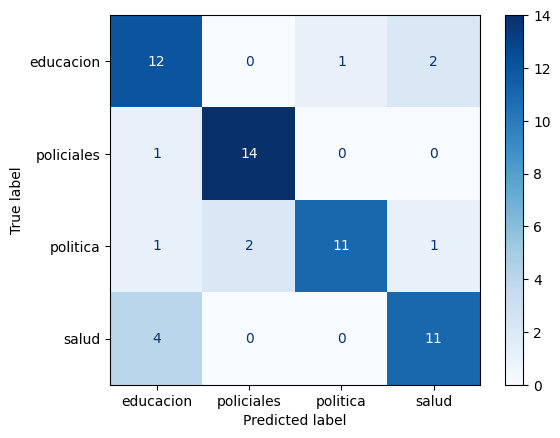

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import make_pipeline

X = df['title'].str.lower()
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777)

pipe = make_pipeline(
  TfidfVectorizer(stop_words=spanish_stop_words),
  LogisticRegression()
)
pipe.fit(X_train, y_train)
y_hat=pipe.predict(X_test)

report_LR = classification_report(y_test, y_hat, zero_division=1)
ConfusionMatrixDisplay(
            confusion_matrix(y_test,y_hat),
            display_labels=pipe[-1].classes_,
        ).plot(cmap=plt.cm.Blues)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

Analicemos los datos obtenidos

In [ ]:
from tabulate import tabulate
titles_test_cases=[
    ("aumentaron los cancer de pulmon en la provincia de buenos aires","salud"),
    ("cae el nivel de educacion","educacion"),
    ("estudio medico muestra que el colesterol es malo","salud"),
    ("Ladron asesinado en la calle","policiales"),
    ("Piden aumentos para docentes","educacion"),
    ("Quien sera el presidente","politica"),
    ("Enfermedades mas contagiosas","salud"),
    ]

titles_hat = pipe.predict([title.lower() for title,cat in titles_test_cases])
resultados=[]

for i, label_hat in enumerate(titles_hat):
  title, label_test = titles_test_cases[i]
  resultados.append([label_test, label_hat, "✔️" if label_test==label_hat else "❌" ,title])
print(tabulate(resultados, headers=["Test Label","Prediccion Label", "Match?" ,"Title"]))

Test Label    Prediccion Label    Match?    Title
------------  ------------------  --------  ---------------------------------------------------------------
salud         salud               ✔️         aumentaron los cancer de pulmon en la provincia de buenos aires
educacion     educacion           ✔️         cae el nivel de educacion
salud         salud               ✔️         estudio medico muestra que el colesterol es malo
policiales    policiales          ✔️         Ladron asesinado en la calle
educacion     salud               ❌        Piden aumentos para docentes
politica      politica            ✔️         Quien sera el presidente
salud         salud               ✔️         Enfermedades mas contagiosas


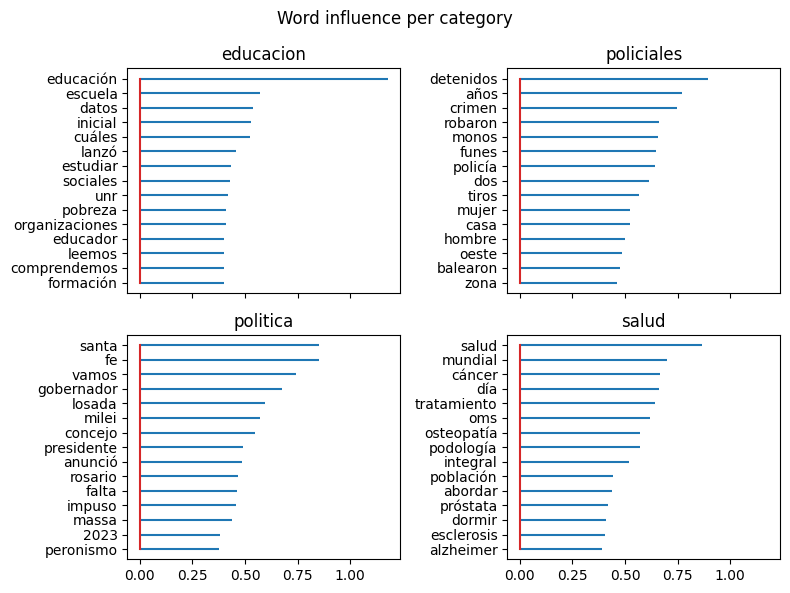

In [ ]:
num_top_features = 15

feature_names =pipe[0].get_feature_names_out()
coef =pipe[-1].coef_

n=len(categorias)//2

fig, axs = plt.subplots(n,2, sharex=True, figsize=(8,6))
fig.suptitle("Word influence per category")
for i, cat in enumerate(pipe[-1].classes_):
  top_features_idx = np.argsort(coef[i])[-num_top_features:]
  top_features_names = [feature_names[j] for j in top_features_idx]
  top_features_coef = coef[i][top_features_idx]
  ax=axs[i//n, i%n]
  ax.stem(top_features_names,top_features_coef, orientation='horizontal',markerfmt=' ')
  ax.set_title(cat)

fig.tight_layout()

###Ejercicio 3

En este tercer ejercicio, se llevaron a cabo tareas específicas para cada categoría de noticias, como procesamiento del texto, conteo de palabras y creación de nubes de palabras. A continuación, se presenta un análisis de los resultados obtenidos:

**Procesamiento del Texto:**

- Normalización y Limpieza: Se realizó una normalización del texto, convirtiendo todas las palabras a minúsculas. Además, se llevaron a cabo tareas de limpieza, eliminando palabras irrelevantes como stop words y signos de puntuación. Este proceso es fundamental para reducir el ruido en los datos y permitir un análisis más preciso.

**Conteo de Palabras y Nube de Palabras**

- Conteo de Palabras: Después del procesamiento del texto, se llevaron a cabo conteos de palabras para cada categoría. Esto proporciona información sobre la cantidad total de palabras presentes en las noticias de cada categoría después del preprocesamiento.

- Nube de Palabras: Se utilizó la técnica de nube de palabras para visualizar las palabras más frecuentes en cada categoría. Las palabras más grandes en la nube indican una mayor frecuencia en los textos procesados.

**Resultados y Análisis:**
1.  Categoría: Policíales
- Total de Documentos: 62
- Total de Palabras Después del Procesamiento: 9570
- Palabras Relevantes: "según," "dos," "año," "hecho," "fiscal"
- Análisis: Las palabras más frecuentes sugieren que las noticias en esta categoría podrían estar relacionadas con informes oficiales, eventos criminales y actividades de los fiscales.

2. Categoría: Política
- Total de Documentos: 62
- Total de Palabras Después del Procesamiento: 22394
- Palabras Relevantes: "mg," "dn," "Santa Fe," "provincia," "política," "Rosario," "candidato"
- Análisis: Las palabras indican que las noticias políticas se centran en figuras públicas, elecciones y eventos políticos tanto a nivel local como provincial. Se observa que 2 de las palabras que aparecieron con mayor frecuencia fueron "mg" y "nd". Investigando el contenido de las noticias se encontró que esas palabras son abreviaciones de David Narciso y Mariano Galíndez, dos periodistas que aparecen reiteradas veces en la noticia https://www.rosario3.com/politica/El-dolar-TrasPaso-el-dilema-del-circulo-rojo-con-Milei-Pullaro-ya-muestra-su-ministro-clave-y-batalla-por-Rosario-20230818-0049.html.

3. Categoría: Salud
- Total de Documentos: 62
- Total de Palabras Después del Procesamiento: 16738
- Palabras Relevantes: "persona," "salud," "año," "enfermedad," "paciente"
- Análisis: Las palabras más comunes sugieren que las noticias en esta categoría se enfocan en temas de salud, enfermedades y pacientes, proporcionando información relevante para la comunidad sobre cuestiones de salud.

4. Categoría: Educación
- Total de Documentos: 62
- Total de Palabras Después del Procesamiento: 13849
- Palabras Relevantes: "estudiante," "año," "escuela," "educación," "aprendizaje"
- Análisis: Las palabras indican que las noticias educativas pueden estar relacionadas con estudiantes, actividades escolares, procesos educativos y aprendizaje en general.



In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
spanish_stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Seleccionar una categoría específica (por ejemplo, "desarrollo de software")
categoria_seleccionada = "politica"

def procesarPalabras(categoria_seleccionada):
    # Filtramos el dataset para obtener solo los textos de la categoría seleccionada
    textos_categoria = df[df["category"]==categoria_seleccionada]["text"].str.lower()

    # Normalización y limpieza del texto
    textos_limpios = []
    for texto in textos_categoria:
        palabras = word_tokenize(texto, language='spanish')
        palabras_filtradas = [palabra for palabra in palabras if palabra.isalpha() and palabra not in spanish_stop_words]
        texto_limpio = ' '.join(palabras_filtradas)
        textos_limpios.append(texto_limpio)

    # Conteo de palabras y creación de la nube de palabras
    texto_concatenado = ' '.join(textos_limpios)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_concatenado)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nube de Palabras para la Categoría '{categoria_seleccionada}'")
    plt.show()

    # Análisis general del resultado obtenido
    print(f"Total de documentos en la categoría '{categoria_seleccionada}': {len(textos_limpios)}")
    print(f"Total de palabras después del procesamiento: {len(texto_concatenado.split())}")


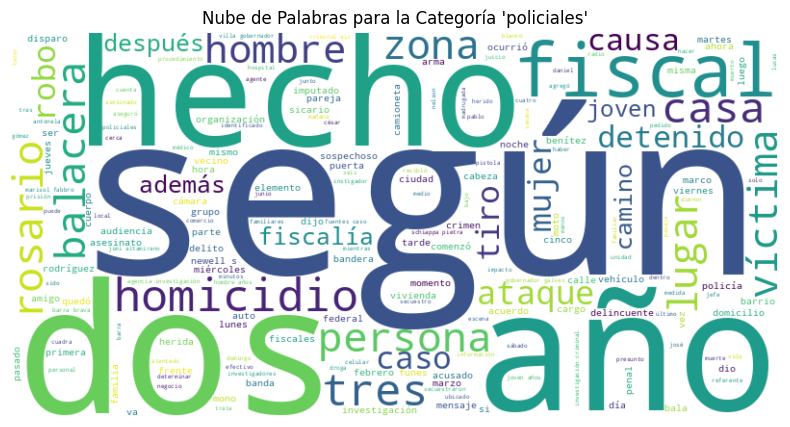

Total de documentos en la categoría 'policiales': 62
Total de palabras después del procesamiento: 9570


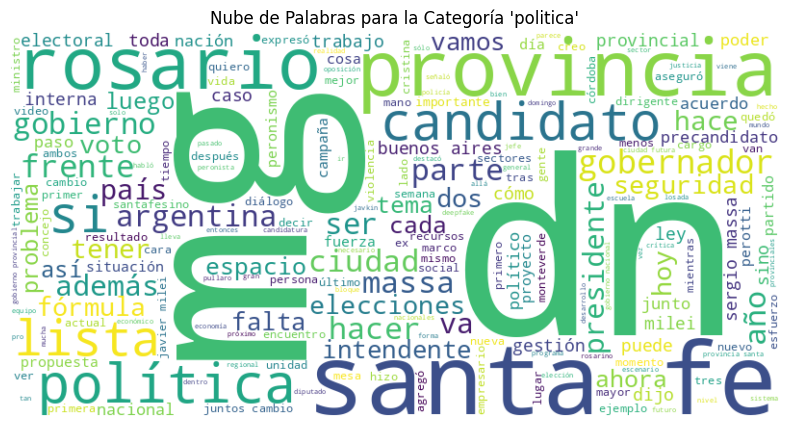

Total de documentos en la categoría 'politica': 62
Total de palabras después del procesamiento: 22394


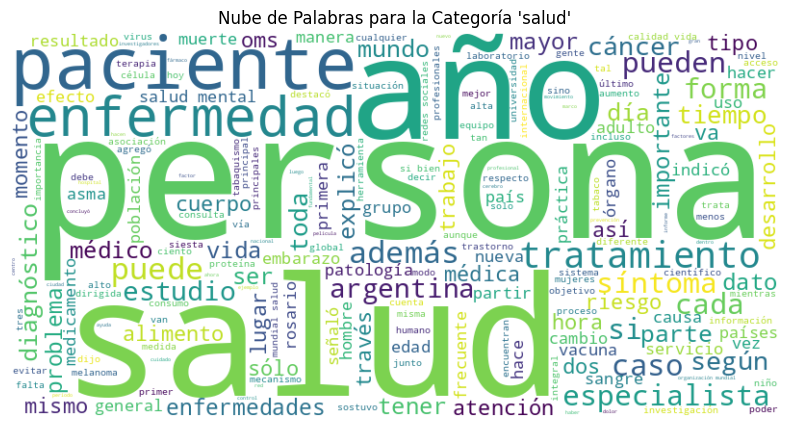

Total de documentos en la categoría 'salud': 62
Total de palabras después del procesamiento: 16738


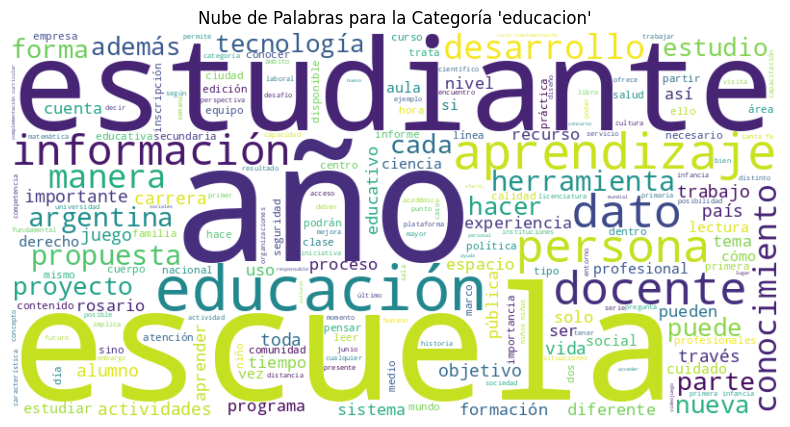

Total de documentos en la categoría 'educacion': 62
Total de palabras después del procesamiento: 13849


In [ ]:
for categoria in categorias:
    procesarPalabras(categoria)

En la categoría politica nos sorprendió que las palabras que aparecieron con mayor frecuencia fueron "mg" y "nd". Investigando el contenido de las noticias encontramos que esas palabras son abreviaciones de David Narciso y Mariano Galíndez, dos periodistas que aparecen reiteradas veces en la noticia https://www.rosario3.com/politica/El-dolar-TrasPaso-el-dilema-del-circulo-rojo-con-Milei-Pullaro-ya-muestra-su-ministro-clave-y-batalla-por-Rosario-20230818-0049.html.  

###Ejercicio 4

**Introducción:**
En este ejercicio, se utilizó una variedad de modelos de embedding para evaluar la similitud entre los títulos de noticias pertenecientes a la categoría 'Salud'. Los modelos utilizados incluyeron Word2Vec, GloVe, BERT, FastText y ELMo. El objetivo fue comparar y contrastar los resultados obtenidos por estos modelos para comprender sus fortalezas y limitaciones en el contexto de la similitud semántica de los textos en español.

**Procedimiento:**

1. Word2Vec:
- Se cargó un modelo pre-entrenado Word2Vec en español.
- Se calculó la similitud coseno entre los dos títulos de noticias.
- Resultado: Similitud de aproximadamente 0.804.

2. GloVe:
- Se utilizó un modelo GloVe pre-entrenado en inglés para calcular la similitud coseno entre los mismos títulos de noticias en español.
- A pesar de la barrera lingüística, se llevó a cabo la evaluación.
- Resultado: Similitud de aproximadamente 0.879.

3. BERT:

- Se utilizó un modelo pre-entrenado de BERT en español y se implementó una técnica de atención_mask para mejorar los resultados.
- Resultado: Similitud de aproximadamente 0.945 después de aplicar attention_mask.

4. FastText:

- Se implementó el modelo FastText entrenado en los títulos de noticias tokenizados.
- Resultado: Similitud de aproximadamente 0.934.

5. ELMo:

- Se utilizó un modelo ELMo pre-entrenado en español para calcular la similitud coseno entre los títulos de noticias.
- Resultado: Similitud de aproximadamente 0.562.

**Análisis y Reflexiones:**

- Word2Vec y GloVe: Ambos modelos mostraron similitud semántica, pero GloVe, a pesar de estar entrenado en inglés, proporcionó una similitud más alta. Esto sugiere que la calidad de los resultados depende tanto del modelo como de los datos lingüísticos subyacentes.

- BERT y FastText: Estos modelos, especialmente BERT después de aplicar attention_mask, proporcionaron similitudes significativamente altas. BERT superó las expectativas, demostrando su capacidad para comprender la semántica de las oraciones en español. FastText también mostró buenos resultados debido a su capacidad para manejar palabras fuera del vocabulario.

- ELMo: ELMo proporcionó la similitud más baja. Esto puede atribuirse a la variabilidad de los embeddings contextualizados, que pueden no ser adecuados para evaluar la similitud entre oraciones completas en este contexto específico.



**Word2Vec**

**Skip-Gram**


In [ ]:
!pip install --quiet gensim
!wget https://cs.famaf.unc.edu.ar/~ccardellino/SBWCE/SBW-vectors-300-min5.bin.gz

--2023-11-04 20:54:04--  https://cs.famaf.unc.edu.ar/~ccardellino/SBWCE/SBW-vectors-300-min5.bin.gz
Resolving cs.famaf.unc.edu.ar (cs.famaf.unc.edu.ar)... 200.16.17.55
Connecting to cs.famaf.unc.edu.ar (cs.famaf.unc.edu.ar)|200.16.17.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1123304474 (1.0G) [application/x-gzip]
Saving to: ‘SBW-vectors-300-min5.bin.gz’

SBW-vectors-300-min 100%[===================>]   1.05G  18.4MB/s    in 60s     

2023-11-04 20:55:05 (17.8 MB/s) - ‘SBW-vectors-300-min5.bin.gz’ saved [1123304474/1123304474]



In [ ]:
from gensim.models import KeyedVectors, Word2Vec
from nltk.tokenize import word_tokenize

modelo = KeyedVectors.load_word2vec_format('SBW-vectors-300-min5.bin.gz', binary=True)

In [ ]:
titulos_salud = [titulo.lower() for categoria, titulo in zip(df['category'], df['title']) if categoria == 'salud']


def calcular_similitud_word2vec(oracion1, oracion2, modelo):
    palabras1 = word_tokenize(oracion1, language='spanish')
    palabras2 = word_tokenize(oracion2, language='spanish')
    embeddings1 = [modelo[palabra] for palabra in palabras1 if palabra in modelo]
    embeddings2 = [modelo[palabra] for palabra in palabras2 if palabra in modelo]
    if embeddings1 and embeddings2:
        similitud = modelo.n_similarity(embeddings1, embeddings2)
        return similitud
    else:
        return 0.0

# Calcular la similitud entre los títulos de la categoría 'Salud'
if len(titulos_salud) >= 2:
    similitud_titulos = calcular_similitud_word2vec(titulos_salud[0], titulos_salud[1], modelo)
    print(f"Similitud entre dos títulos de 'Salud': {similitud_titulos}")
else:
    print("No hay suficientes títulos de 'Salud' para calcular la similitud.")


Similitud entre dos títulos de 'Salud': 0.8043760657310486


**GloVe**

In [ ]:
import torch
from torchtext.vocab import GloVe
from nltk.tokenize import word_tokenize


embedding = GloVe(name='6B', dim=100)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.41MB/s]                           
100%|█████████▉| 399999/400000 [00:25<00:00, 15398.26it/s]


In [ ]:
def calcular_similitud_glove(oracion1, oracion2, modelo):
    palabras1 = word_tokenize(oracion1, language='spanish')
    palabras2 = word_tokenize(oracion2, language='spanish')
    embeddings1 = [modelo[palabra] for palabra in palabras1 if palabra in modelo.stoi]
    embeddings2 = [modelo[palabra] for palabra in palabras2 if palabra in modelo.stoi]
    if embeddings1 and embeddings2:
        vec1 = torch.mean(torch.stack(embeddings1), dim=0)
        vec2 = torch.mean(torch.stack(embeddings2), dim=0)
        similitud = torch.nn.functional.cosine_similarity(vec1.unsqueeze(0), vec2.unsqueeze(0))
        return similitud.item()
    else:
        return 0.0

similitud_oraciones = calcular_similitud_glove(titulos_salud[0], titulos_salud[1], embedding)
print(f"Similitud entre las oraciones: {similitud_oraciones}")


Similitud entre las oraciones: 0.879338264465332


**BERT**

In [ ]:
!pip install --quiet transformers
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.4 MB/s eta 0:00:00


In [ ]:
# Se carga el modelo preentrenado y el tokenizador de BERT en español
modelo_bert = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
tokenizer_bert = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

titulos_salud = [titulo.lower() for categoria, titulo in zip(df['category'], df['title']) if categoria == 'salud']

def calcular_similitud_bert(oracion1, oracion2, modelo, tokenizer):
    palabras1 = word_tokenize(oracion1, language='spanish')
    palabras2 = word_tokenize(oracion2, language='spanish')
    tokens1 = tokenizer.encode(" ".join(palabras1), add_special_tokens=True)
    tokens2 = tokenizer.encode(" ".join(palabras2), add_special_tokens=True)

    max_length = 16  # Longitud máxima que puede manejar BERT

    # Nos aseguramos que las listas tengan la misma longitud
    tokens1 = tokens1[:max_length] + [tokenizer.pad_token_id] * (max_length - len(tokens1))
    tokens2 = tokens2[:max_length] + [tokenizer.pad_token_id] * (max_length - len(tokens2))

    input_ids = torch.tensor([tokens1, tokens2])

    with torch.no_grad():
        outputs = modelo(input_ids)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # Se toma el promedio de los embeddings de las palabras

    similitud = cosine_similarity(embeddings.numpy())
    return similitud[0, 1]

if len(titulos_salud) >= 2:
    similitud_titulos = calcular_similitud_bert(titulos_salud[0], titulos_salud[1], modelo_bert, tokenizer_bert)
    print(f"Similitud entre dos títulos de 'Salud' usando BERT: {similitud_titulos}")
else:
    print("No hay suficientes títulos de 'Salud' para calcular la similitud.")


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Similitud entre dos títulos de 'Salud' usando BERT: 0.6549288034439087


Se procede a utilizar attention_mask para mejorar los resultados

In [ ]:
tokenizer_bert = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
modelo_bert = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

def calcular_similitud_bert(oracion1, oracion2, modelo, tokenizer):
    # Se tokenizan las oraciones y se agrega la atención_mask
    tokens1 = tokenizer.encode(oracion1, add_special_tokens=True, max_length=128, pad_to_max_length=True, truncation=True)
    tokens2 = tokenizer.encode(oracion2, add_special_tokens=True, max_length=128, pad_to_max_length=True, truncation=True)

    input_ids = torch.tensor([tokens1, tokens2])
    attention_mask = (input_ids != 0).float()  # Crear la attention_mask

    with torch.no_grad():
        outputs = modelo(input_ids=input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state.mean(dim=1)

    similitud = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
    return similitud.item()

# Ejemplo de uso
titulos_salud = [titulo.lower() for categoria, titulo in zip(df['category'], df['title']) if categoria == 'salud']
if len(titulos_salud) >= 2:
    similitud_titulos = calcular_similitud_bert(titulos_salud[0], titulos_salud[1], modelo_bert, tokenizer_bert)
    print(f"Similitud entre dos títulos de 'Salud' usando BERT: {similitud_titulos}")
else:
    print("No hay suficientes títulos de 'Salud' para calcular la similitud.")


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Similitud entre dos títulos de 'Salud' usando BERT: 0.9451683759689331


**FastText**

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)


In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

# Se convierte primero los títulos de salud en listas de palabras tokenizadas
titulos_tokenizados = [word_tokenize(titulo, language='spanish') for titulo in titulos_salud]

modelo_fasttext = FastText(sentences=titulos_tokenizados, vector_size=100, window=5, min_count=1, sg=1)

def calcular_similitud_fasttext(oracion1, oracion2, modelo):
    embeddings1 = [modelo.wv[palabra] for palabra in oracion1 if palabra in modelo.wv]
    embeddings2 = [modelo.wv[palabra] for palabra in oracion2 if palabra in modelo.wv]
    if embeddings1 and embeddings2:
        similitud = modelo.wv.n_similarity(embeddings1, embeddings2)
        return similitud
    else:
        return 0.0

if len(titulos_tokenizados) >= 2:
    similitud_titulos = calcular_similitud_fasttext(titulos_tokenizados[0], titulos_tokenizados[1], modelo_fasttext)
    print(f"Similitud entre dos títulos de 'Salud' usando FastText: {similitud_titulos}")
else:
    print("No hay suficientes títulos de 'Salud' para calcular la similitud.")



Similitud entre dos títulos de 'Salud' usando FastText: 0.9338228106498718


**ELMo**

In [ ]:
!wget http://vectors.nlpl.eu/repository/11/145.zip
!unzip 145.zip -d elmo_es
# Solución para evitar errores en Colab (https://github.com/HIT-SCIR/ELMoForManyLangs/issues/100)
!pip uninstall overrides
!pip install overrides==3.1.0
!pip install elmoformanylangs

In [ ]:
from elmoformanylangs import Embedder
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

model_dir = '/content/elmo_es'

elmo = Embedder(model_dir)

oracion1 = titulos_salud[0]
oracion2 = titulos_salud[1]

def calcular_similitud_elmo(oracion1, oracion2, modelo_elmo):
    embedding_oracion1 = modelo_elmo.sents2elmo([oracion1])
    embedding_oracion2 = modelo_elmo.sents2elmo([oracion2])

    # Obtener las representaciones vectoriales de dimensión 1024
    embedding_oracion1 = embedding_oracion1[0][0]
    embedding_oracion2 = embedding_oracion2[0][0]

    similitud = cosine_similarity(embedding_oracion1.reshape(1, -1), embedding_oracion2.reshape(1, -1))
    return similitud[0, 0]


similitud = calcular_similitud_elmo(oracion1, oracion2, elmo)
print(f"Similitud de coseno entre las dos oraciones usando ELMo: {similitud}")


INFO:elmoformanylangs:char embedding size: 2637
INFO:elmoformanylangs:word embedding size: 185214
INFO:elmoformanylangs:Model(
  (token_embedder): ConvTokenEmbedder(
    (word_emb_layer): EmbeddingLayer(
      (embedding): Embedding(185214, 100, padding_idx=3)
    )
    (char_emb_layer): EmbeddingLayer(
      (embedding): Embedding(2637, 50, padding_idx=2634)
    )
    (convolutions): ModuleList(
      (0): Conv1d(50, 32, kernel_size=(1,), stride=(1,))
      (1): Conv1d(50, 32, kernel_size=(2,), stride=(1,))
      (2): Conv1d(50, 64, kernel_size=(3,), stride=(1,))
      (3): Conv1d(50, 128, kernel_size=(4,), stride=(1,))
      (4): Conv1d(50, 256, kernel_size=(5,), stride=(1,))
      (5): Conv1d(50, 512, kernel_size=(6,), stride=(1,))
      (6): Conv1d(50, 1024, kernel_size=(7,), stride=(1,))
    )
    (highways): Highway(
      (_layers): ModuleList(
        (0-1): 2 x Linear(in_features=2048, out_features=4096, bias=True)
      )
    )
    (projection): Linear(in_features=2148, out_f

Similitud de coseno entre las dos oraciones usando ELMo: 0.5620654821395874


### Ejercicio 5

Al ser noticias se opta por realizar un resumen extractivo para mantener la mayor parte del texto original.

In [ ]:
# Cargamos el dataset
![ ! -e 'noticias.csv' ] && gdown '1A_UqhWpWjTNrwGRmeRkFg73PTqd9Ma0E'

categorias=['policiales','politica','salud','educacion']

import pandas as pd
df = pd.read_csv('noticias.csv')
df.dropna(how="any", inplace=True)
df.head(2)


,date,daily_number,url,title,category,text
0,20230819,4,https://www.rosario3.com/policiales/Asesinaron...,Asesinaron a un joven mientras paseaba su perr...,policiales,En la noche del viernes un joven de 24 años fu...
1,20230819,7,https://www.rosario3.com/policiales/Allanamien...,Allanamientos en Rosario por producción y tene...,policiales,Un hombre y una mujer fueron detenidos al cabo...


In [ ]:
df.value_counts("category")

category
policiales    600
politica      598
salud         112
educacion      62
dtype: int64

In [ ]:
# Nos aseguramos tenemos el modelo
!pip install -q spacy && python -m spacy download es_core_news_lg > /dev/null 2>&1

In [ ]:
import networkx as nx
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# Función para generar un resumen extractivo usando PageRank
def summarize(similarity_matrix, num_sentences=3):
    try:
        nx_graph = nx.from_numpy_array(similarity_matrix)
        scores = nx.pagerank(nx_graph, max_iter=500)  # Aumentar el número máximo de iteraciones
        ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(original_sentences)), reverse=True)
        return ' '.join([ranked_sentences[i][1] for i in range(num_sentences)])
    except nx.PowerIterationFailedConvergence:
        return "No se pudo generar un resumen para esta noticia."


nlp = spacy.load('es_core_news_lg')

# Interacción con el usuario para elegir una categoría
print("Categorías disponibles",",".join(categorias))
categoria_elegida = input("Por favor, elige una categoría para generar resúmenes: ")


if categoria_elegida.lower() in categorias:

    noticias_categoria = [contenido.lower() for categoria, contenido in zip(df['category'], df['text']) if categoria.lower() == categoria_elegida.lower()]

    for idx, noticia in enumerate(noticias_categoria[:10]):
        print(f"\nResumen de la noticia {idx + 1}:")
        # Se procede a lematizar y eliminar stopwords
        lemmatized_sentences = []
        original_sentences = []
        doc = nlp(noticia)
        for sent in doc.sents:
            lemmatized_sentence = " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
            if lemmatized_sentence.strip() != '':
                lemmatized_sentences.append(lemmatized_sentence)
                original_sentences.append(str(sent).strip())

       # Se obtienen los vectores
        lemmatized_docs = [nlp(sent) for sent in lemmatized_sentences]

        sentence_vectors = [sent.vector for sent in lemmatized_docs]

        similarity_matrix = cosine_similarity(sentence_vectors)

        resumen = summarize(similarity_matrix, num_sentences=4)
        print(resumen)

Categorías disponibles policiales,politica,salud,educacion
Por favor, elige una categoría para generar resúmenes: salud

Resumen de la noticia 1:
la información judicial indica que "se pudo establecer la presunta participación no punible de un niño de 14 años" en la muerte de joaquín y añade que "el adolescente involucrado en el hecho actualmente se encuentra alojado para su resguardo en el centro de admisión y diagnostico (cad), que depende del complejo esperanza, de la ciudad de córdoba", donde en las próximas horas se llevarán a cabo estudios diagnósticos, psicosociales y ambientales. la licenciada en psicopedagogía, laura waisman, considera necesario "construir espacios de diálogo y comunicación en las escuelas para que chicos, docentes y toda la comunidad educativa, pongan en palabras lo que sienten frente al dolor y la sorpresa". la importancia del diálogo “los medios de comunicación, las redes sociales ofrecen datos e información permanentemente y los jóvenes, a su vez, acceden 

#### Telegram Bot (Opcional) + Resumen Abstractivo

Bot-link: https://t.me/canillita_r3_bot

En este ejercicio opcional, se implementó un bot de Telegram utilizando la librería pyTelegramBotAPI para proporcionar resúmenes de noticias de diferentes categorías generadas a través de la técnica abstractiva. A continuación, se presenta un informe detallado del desarrollo y funcionamiento del bot:

**Funcionamiento del Bot:**

- Comandos Disponibles:
El bot responde a comandos como /start, /help y las categorías específicas de noticias (por ejemplo, /policiales, /politica, /salud, /educacion, /random).
Al recibir un comando de categoría, el bot muestra hasta 4 resúmenes de noticias de esa categoría.

**Estructura del Código:**
- Configuración Inicial:
Se estableció un mensaje de bienvenida (WELCOME_MSG) para informar a los usuarios sobre las categorías disponibles.
Se configuró un mensaje de ayuda (HELP_MSG) para proporcionar orientación sobre cómo usar el bot.

- Funciones Principales:
-- check_in_progress(msg: Message): Esta función verifica si el bot está en medio de la ejecución de un comando para evitar la repetición de solicitudes por parte del usuario mientras se está procesando una solicitud anterior.
-- cmd_start(msg: Message): Maneja el comando /start y muestra el mensaje de bienvenida.
-- cmd_categorias(msg: Message): Maneja los comandos de categorías específicas y muestra resúmenes de noticias según la categoría solicitada.

**Resultados y Funcionalidad:**
- Interacción del Usuario:
Los usuarios pueden interactuar con el bot solicitando noticias de diferentes categorías.
Se proporciona retroalimentación durante el proceso de búsqueda para informar al usuario que se están obteniendo las noticias.

- Manejo de Errores:
Se implementó un manejo de errores básico para informar al usuario si algo sale mal durante la obtención de las noticias.

In [ ]:
![ ! -e 'noticias.csv' ] && gdown '1A_UqhWpWjTNrwGRmeRkFg73PTqd9Ma0E'

categorias=['policiales','politica','salud','educacion']

import pandas as pd
df = pd.read_csv('noticias.csv')
df.dropna(how="any", inplace=True)
df.head(2)

,date,daily_number,url,title,category,text
0,20230819,4,https://www.rosario3.com/policiales/Asesinaron...,Asesinaron a un joven mientras paseaba su perr...,policiales,En la noche del viernes un joven de 24 años fu...
1,20230819,7,https://www.rosario3.com/policiales/Allanamien...,Allanamientos en Rosario por producción y tene...,policiales,Un hombre y una mujer fueron detenidos al cabo...


In [38]:
!pip install --quiet transformers sentencepiece torch > /dev/null 2>&1
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained('t5-base')
model = T5ForConditionalGeneration.from_pretrained('t5-base')

(…)ace.co/t5-base/resolve/main/spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

(…)e.co/t5-base/resolve/main/tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

(…)face.co/t5-base/resolve/main/config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

(…)base/resolve/main/generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [39]:
!pip install --quiet pyTelegramBotAPI > /dev/null 2>&1

In [40]:
def traer_noticias(categoria, n=5, len=250):
  news = (df if categoria=="random" else df[df['category']==categoria]).sample(n=n)
  for i,(title, text, url) in enumerate(news[["title","text","url"]].values):
    inputs = tokenizer.encode("summarize: "+text, return_tensors="pt", max_length=600, truncation=True)
    summary_ids = model.generate(inputs, max_length=len, min_length=25, length_penalty=2.0, num_beams=4, early_stopping=True)
    resumen = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    title=f'<b><a href="{url}">{title}</a></b>'
    yield i, title, resumen

categorias_bot=categorias+["random"]
WELCOME_MSG="""🗞️🗞️📰 !! EXTRA EXTRA!! 📰📰
Tenemos noticias sobre las siguientes categorias !!
"""+"\n".join((f' - /{c}'for c in categorias_bot))
HELP_MSG="??\nPrueba con /help"

In [ ]:
bot_token='6932792546:AAGlbhMgZTIAR4gz9STdi5CsJxs0rWc-Dpk'

import telebot
from telebot.types import Message
bot = telebot.TeleBot(token=bot_token, skip_pending=True)
in_progress=False

n_noticias=4

def check_in_progress(msg: Message):
  if in_progress:
    bot.send_message(msg.chat.id, "ESPERE!! PERO PUCHAAA !!!")
    return True

@bot.message_handler(commands=['start', 'help'])
def cmd_start(msg: Message):
  if check_in_progress(msg): return
  bot.send_message(msg.chat.id, WELCOME_MSG)

@bot.message_handler(commands=categorias_bot)
def cmd_categorias(msg: Message):
  global in_progress
  if check_in_progress(msg): return
  category=msg.text.split()[0][1:]
  try:
    in_progress=True
    bot.send_message(msg.chat.id, f"🗞️ resumiendo {n_noticias} noticias ...")
    for i, *noticia in traer_noticias(category,n=n_noticias):
      bot.send_message(msg.chat.id,f"<i>Noticia {i+1}</i>\n"+"\n".join(noticia), parse_mode='HTML')
    bot.send_message(msg.chat.id, "Listo !")
  except e:
    print(e)
    bot.send_message(msg.chat.id, "UUUOoopsss algo falló!")
  finally:
    in_progress=False

@bot.message_handler()
def cmd_categorias(msg: Message):
  if check_in_progress(msg): return
  if msg.text.startswith("/"):
    bot.reply_to(msg, HELP_MSG)

print("Iniciando bot en https://t.me/canillita_r3_bot")
bot.polling(skip_pending=True, non_stop=True)

Iniciando bot en https://t.me/canillita_r3_bot
